In [2]:
# --- Import Library------
import numpy as np
from PIL import Image

# ---- Load Foto/Gambar dan konversi ke GrayScale ----
img = Image.open("Foto Petra.jpg").convert("L")

# -- Konversi ke array ----
pixel = np.array(img)

# -- Verifikasi ----
print(f"Shape dari pixel:  {pixel.shape}") # periksa shape/dimensi dari gambar
print(f"Bentuk 5x5 pixel awal/pertama: {pixel[:5, :5]}")

Shape dari pixel:  (1280, 853)
Bentuk 5x5 pixel awal/pertama: [[255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]]


In [6]:
# Buat Convolution 2D

def convo(image, kernel):
    H, W = image.shape
    kH, kW = kernel.shape
    pad = kH // 2 # buat kernel 

    output = [[0]*W for _ in range(H)] 

    for i in range(pad, H-pad): # perhitungan mundur kernel dari Baris paling pertama 
        for j in range(pad, W-pad): # perhitungan mundur dari kolom paling pertama

            acc = 0
            for m in range(kH):
                for n in range(kW):
                    acc += image[i-pad+m][j-pad+m] * kernel[m][n]
            output [i][j] = acc
                
    return output



 

In [7]:
# buat kernel blur / sharpen / edge detect

blur_kernel = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])  # 1/9 karena dalam grayscale mean = blur
# karena kernelnya berdimensi 3x3 = 9, maka mean-nya 1/9

""""
Contoh untuk kernel sharpen/Tajam/Kontras
sharpen_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])
"""

# apply untuk kernel blur
blurred = convo(pixel, blur_kernel)
#blurred = convolve(pixels, blur_kernel)


In [8]:
# Buat edge detector (Sobel)

sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

# apply
Gx = convo(pixel, sobel_x)
Gy = convo(pixel, sobel_y)


In [9]:
import numpy as np

edge = np.sqrt(np.square(Gx) + np.square(Gy))
edge = (edge / np.max(edge)) * 255
edge = edge.astype(np.uint8)


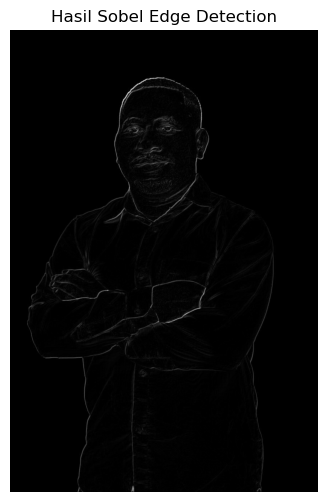

In [10]:
# Plot hasil
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.imshow(edge, cmap='gray')
plt.title("Hasil Sobel Edge Detection")
plt.axis('off')
plt.show()


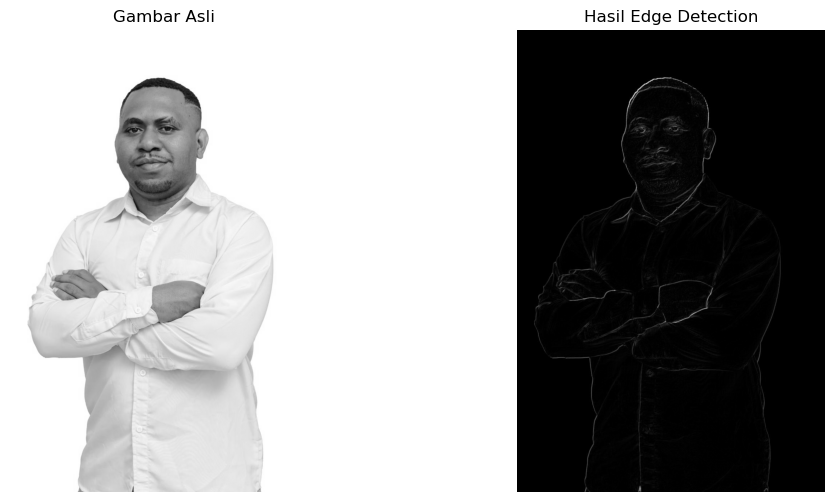

In [11]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(pixel, cmap='gray')
plt.title("Gambar Asli")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(edge, cmap='gray')
plt.title("Hasil Edge Detection")
plt.axis('off')

plt.show()


# 📘 Ringkasan: Dasar Computer Vision dari Scratch

## 1. Representasi Dasar Gambar

Pada dasarnya, komputer melihat gambar sebagai matriks angka. Setiap angka mewakili kecerahan piksel dalam rentang:

- **0** → hitam
- **255** → putih
- **Nilai di antaranya** → abu-abu

Misalnya sebuah gambar ber-shape **(1280, 853)** foto saya pribadi artinya:

- 1280 baris piksel
- 853 kolom piksel

Kalau dilihat `pixel[:5, :5]`, itu artinya mengambil 5 baris pertama dan 5 kolom pertama—sebuah cuplikan kecil dari gambar besar. Dalam kasus project ini, sampelnya:

```
[[255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]]
```

Artinya area paling atas-kiri gambar itu putih (nilai 255 semua).

---

## 2. Intuisi Convolution dari Nol

Convolution adalah cara komputer membaca gambar dengan memakai pola kecil bernama **kernel**. Kernel ini "digarukkan" atau juga seperti kaca pembesar yang meng-Zoom in suatu deareah tertentu di atas gambar seperti spons kecil yang berjalan dari kiri atas ke kanan bawah.

Setiap kali kernel berada di satu posisi:

1. Ambil piksel-piksel yang tertutup kernel
2. Kalikan satu per satu dengan isi kernel
3. Jumlahkan hasilnya

Hasil penjumlahan itu jadi nilai piksel baru pada gambar output.

Intinya: kernel memiliki peran ke gambar → **"Mengecek Seberapa cocok area di yang di hitungnya dengan pola yang dibawahnya?"**

---

## 3. Kenapa Blur Kernel Semua 1/9

Kernel blur 3×3 berisi:

$$
\begin{bmatrix}
\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
\frac{1}{9} & \frac{1}{9} & \frac{1}{9}
\end{bmatrix}
$$

Ada 3 alasan inti:

**(1) Kernel-nya berukuran 3×3 → total 9 elemen**

Jika ingin membuat rata-rata (mean), maka setiap elemen = 1/9.

**(2) Nilai sama membuat area diratakan**

Semua piksel dalam jendela 3×3 mendapat bobot identik → hasilnya lebih halus.

**(3) Blur berguna menghapus noise**

Noise adalah titik-titik kecil yang tiba-tiba sangat gelap/terang. Blur meratakan area, sehingga noise mengecil.

---

## 4. Apa Itu Sobel dan Kenapa Penting

Sobel adalah operator pendeteksi tepi/sudut. Tepi muncul ketika ada perubahan drastis antara gelap–terang ataupun sebaliknya.

Ada dua Sobel:

- **Sobel X** → mendeteksi tepi vertikal (garis tegak)
- **Sobel Y** → mendeteksi tepi horizontal (garis mendatar)

Keduanya bekerja dengan membandingkan bagian kiri vs kanan (untuk X) dan atas vs bawah (untuk Y). Jika perubahan sangat besar → itu adalah garis.

Untuk menggabungkan keduanya, hitung jarak/besaran/magnitude:

$$
\text{magnitude} = \sqrt{G_x^2 + G_y^2}
$$

Ini menggabungkan kedua informasi tepi/sudut sehingga menghasilkan garis yang lebih jelas.

---

## 5. Kenapa Blur Diberikan Sebelum Sobel?

Karena Sobel sangat sensitif terhadap perubahan kecil. Jika gambar penuh noise, Sobel akan mendeteksi garis/sudut" palsu yang dapat mengurangi keakuratan.

**Blur = membersihkan gambar dulu.**

Analogi: Menebalkan garis pada gambar, tapi gambarnya kotor. Maka hapus kotorannya dulu agar garis aslinya terlihat jelas dan objek semakin mudah dideteksi.

---

## 6. Alur Logika Utama

Dari input gambar hingga hasil pendeteksian tepi:

1. Baca gambar → jadikan grayscale
2. Blur untuk merapikan noise
3. Sobel X & Y menghitung perubahan kiri-kanan & atas-bawah
4. Gabungkan magnitude untuk mendapatkan tepi final
5. Normalisasi 0–255 biar hasil bisa dilihat sebagai gambar

Inilah pipeline dasar dalam computer vision klasik.

---

## 🎯 Versi Ringkas Super-Singkat

- **Gambar = matriks angka.**
- **Blur = meratakan nilai piksel supaya gambar bersih.**
- **Sobel = alat untuk mencari tepi (perubahan cepat gelap-terang).**
- **Sobel X → garis vertikal, Sobel Y → garis horizontal.**
- **Magnitude → tepi final.**

---

## 📊 Contoh Perhitungan Konkret

### Setup: Patch Gambar 3×3 dari Data Sesungguhnya

Dari output di atas, pixel[:5, :5] menunjukkan mayoritas bernilai 255 (area putih/terang) di area atas-kiri gambar. Namun gambar sesungguhnya memiliki variasi nilai piksel yang berbeda di bagian lain.

Untuk contoh yang lebih realistis, mari gunakan patch 3×3 yang menunjukkan perubahan nilai (area dengan tepi):

```
A = 
[ 100  100  100
  100  255  255
  100  255  255 ]
```

Patch ini merepresentasikan area dengan perubahan nilai piksel dalam gambar (1280×853) — ada transisi dari area gelap (100) ke area terang (255). Ini adalah kasus yang akan menghasilkan tepi yang terdeteksi.
.

---

### 1. Perhitungan Blur 3×3 (Semua 1/9)

Kernel blur:

$$
K_{\text{blur}} = \begin{bmatrix}
\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
\frac{1}{9} & \frac{1}{9} & \frac{1}{9}
\end{bmatrix}
$$

Cara hitung (convolution): Kalikan setiap nilai piksel dengan 1/9 lalu jumlahkan semuanya:

$$
\text{Blur} = (100 + 100 + 100 + 100 + 255 + 255 + 100 + 255 + 255) \times \frac{1}{9}
$$

Total = 1420, jadi:

$$
\text{Blur} = 1420 \times \frac{1}{9} \approx 157.8
$$

**Interpretasi:** Kernel blur bertanya → *"Berapa nilai rata-rata semua piksel di sekitar?"* Jawabannya: **~158** → karena ada campuran nilai 100 dan 255, hasil blur menjadi nilai tengah. Ini adalah efek blur — merapikan transisi yang keras menjadi lebih halus.

---

### 2. Perhitungan Sobel X (Deteksi Tepi Vertikal)

Kernel Sobel X:

$$
\text{Sobel X} = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}
$$

Lakukan convolution:

$$
G_x = (100 \times -1) + (100 \times 0) + (100 \times 1) + (100 \times -2) + (255 \times 0) + (255 \times 2) + (100 \times -1) + (255 \times 0) + (255 \times 1)
$$

Hitung satu-satu:

$$
= (-100) + 0 + 100 + (-200) + 0 + 510 + (-100) + 0 + 255
$$

Kelompokkan:

$$
= (100 - 100) + (510 - 200) + (255 - 100) = 0 + 310 + 155 = 465
$$

**Interpretasi:** Karena ada perubahan nilai antara kiri (mayoritas 100) dan kanan (mayoritas 255) → Gx = 465 (besar!). Nilai positif dan besar ini menunjukkan ada garis vertikal kuat — transisi dari gelap ke terang di sisi kanan patch.

---

### 3. Perhitungan Sobel Y (Deteksi Tepi Horizontal)

Kernel Sobel Y:

$$
\text{Sobel Y} = \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
$$

Convolution:

$$
G_y = (100 \times -1) + (100 \times -2) + (100 \times -1) + (100 \times 0) + (255 \times 0) + (255 \times 0) + (100 \times 1) + (255 \times 2) + (255 \times 1)
$$

Hitung:

$$
= (-100 - 200 - 100) + (0 + 0 + 0) + (100 + 510 + 255)
$$

$$
= (-400) + 0 + 865 = 465
$$

**Interpretasi:** Ada perubahan nilai antara atas (mayoritas 100) dan bawah (mayoritas 255) → Gy = 465 (besar!). Nilai positif dan besar ini menunjukkan ada garis horizontal kuat — transisi dari gelap di atas ke terang di bawah patch.

---

### 4. Magnitude Edge (Gabungan X & Y)

Tepi/sudut sebenarnya adalah gabungan keduanya:

$$
\text{magnitude} = \sqrt{G_x^2 + G_y^2} = \sqrt{465^2 + 465^2} = \sqrt{216225 + 216225} = \sqrt{432450} \approx 657.6
$$

**Interpretasi:** Karena Gx dan Gy keduanya besar dan sama (465), magnitude juga sangat besar (~658). Nilai besar ini menunjukkan ada tepi kuat — ada perubahan drastis antara area gelap dan terang dalam patch ini, baik secara vertikal maupun horizontal.

---

### 5. Normalisasi 0–255

Agar terlihat sebagai gambar:

$$
\text{edge}_{\text{norm}} = \frac{\text{magnitude}}{\text{max\_val}} \times 255
$$

Misalkan max_val dalam gambar adalah ~658 (nilai magnitude terbesar), maka:

$$
\text{edge}_{\text{norm}} = \frac{657.6}{658} \times 255 \approx 255
$$

Artinya: patch ini mengandung tepi yang sangat kuat → hasil normalisasi mendekati 255 (putih di gambar edge output). Pixel ini akan terlihat cerah/putih di gambar hasil edge detection, menunjukkan lokasi tepi.

---

## 🎯 Ringkasan Perhitungan Dengan 1 Kalimat

**Contoh dengan area yang punya tepi (gelap ↔ terang):** Blur → 158 | Sobel X → 465 | Sobel Y → 465 | Magnitude → 658 | Normalisasi → 255 (tepi terdeteksi dengan jelas). **Sebaliknya, di area gambar yang uniform** (seperti pixel[:5,:5] yang mayoritas 255), hasil Sobel dan Magnitude akan mendekati 0, tidak ada tepi yang terdeteksi.